In [ ]:
#@title EL OJO DE 'BUCAR'
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title **code** Loading and inspecting
data =  pd.read_csv("/content/drive/My Drive/AI_2023/proyecto/data/Delitos_en_Bucaramanga_enero_2010_a_diciembre_de_2021.csv", sep=",")
type(data)

<ipython-input-3-4a7e963a57dd>:2: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data =  pd.read_csv("/content/drive/My Drive/AI_2023/proyecto/data/Delitos_en_Bucaramanga_enero_2010_a_diciembre_de_2021.csv", sep=",")


pandas.core.frame.DataFrame

In [ ]:
import numpy as np

# Evaluating the dataset based on the specified metrics

# 1. Completitud - Checking for missing values
missing_values = data.isnull().sum()

# 2. Consistencia y Uniformidad - Checking data types and unique values for potential inconsistencies
data_types = data.dtypes
unique_values = data.nunique()

# 3. Precisión - This typically requires an external reference for validation, which we don't have access to.

# 4. Validez - Checking for values out of expected ranges (for LATITUD and LONGITUD)
# Assuming latitude and longitude for Bucaramanga: Latitude (7.11392, 7.1250), Longitude (-73.1198, -73.1070)
valid_lat = data[(data['LATITUD'] >= 7.11392) & (data['LATITUD'] <= 7.1250)]
valid_lon = data[(data['LONGITUD'] >= -73.1198) & (data['LONGITUD'] <= -73.1070)]

# 5. Unicidad - Checking for duplicate rows
duplicates = data.duplicated().sum()

# 6. Integridad Referencial - Not applicable as we only have a single table.

# 7. Anomalías y Outliers - Using IQR for numerical columns
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_lat = detect_outliers(data, 'LATITUD')
outliers_lon = detect_outliers(data, 'LONGITUD')

# 8. Tendencias Temporales - Checking for data distribution over years
yearly_distribution = data['ANO'].value_counts().sort_index()

# Compiling the results
metrics_results = {
    "Missing Values": missing_values,
    "Data Types": data_types,
    "Unique Values": unique_values,
    "Valid Latitude Range Count": len(valid_lat),
    "Valid Longitude Range Count": len(valid_lon),
    "Duplicate Rows": duplicates,
    "Outliers in Latitude": len(outliers_lat),
    "Outliers in Longitude": len(outliers_lon),
    "Yearly Distribution": yearly_distribution
}

metrics_results


TypeError: ignored

In [ ]:
# Converting LATITUD and LONGITUD to numeric values, handling non-numeric entries as NaN
data['LATITUD'] = pd.to_numeric(data['LATITUD'], errors='coerce')
data['LONGITUD'] = pd.to_numeric(data['LONGITUD'], errors='coerce')

# Re-evaluating the metrics after conversion

# 4. Validez - Checking for values out of expected ranges (for LATITUD and LONGITUD) again
valid_lat = data[(data['LATITUD'] >= 7.11392) & (data['LATITUD'] <= 7.1250)]
valid_lon = data[(data['LONGITUD'] >= -73.1198) & (data['LONGITUD'] <= -73.1070)]

# 7. Anomalías y Outliers - Using IQR for numerical columns again
outliers_lat = detect_outliers(data, 'LATITUD')
outliers_lon = detect_outliers(data, 'LONGITUD')

# Updating the results
metrics_results['Valid Latitude Range Count'] = len(valid_lat)
metrics_results['Valid Longitude Range Count'] = len(valid_lon)
metrics_results['Outliers in Latitude'] = len(outliers_lat)
metrics_results['Outliers in Longitude'] = len(outliers_lon)

metrics_results


NameError: ignored

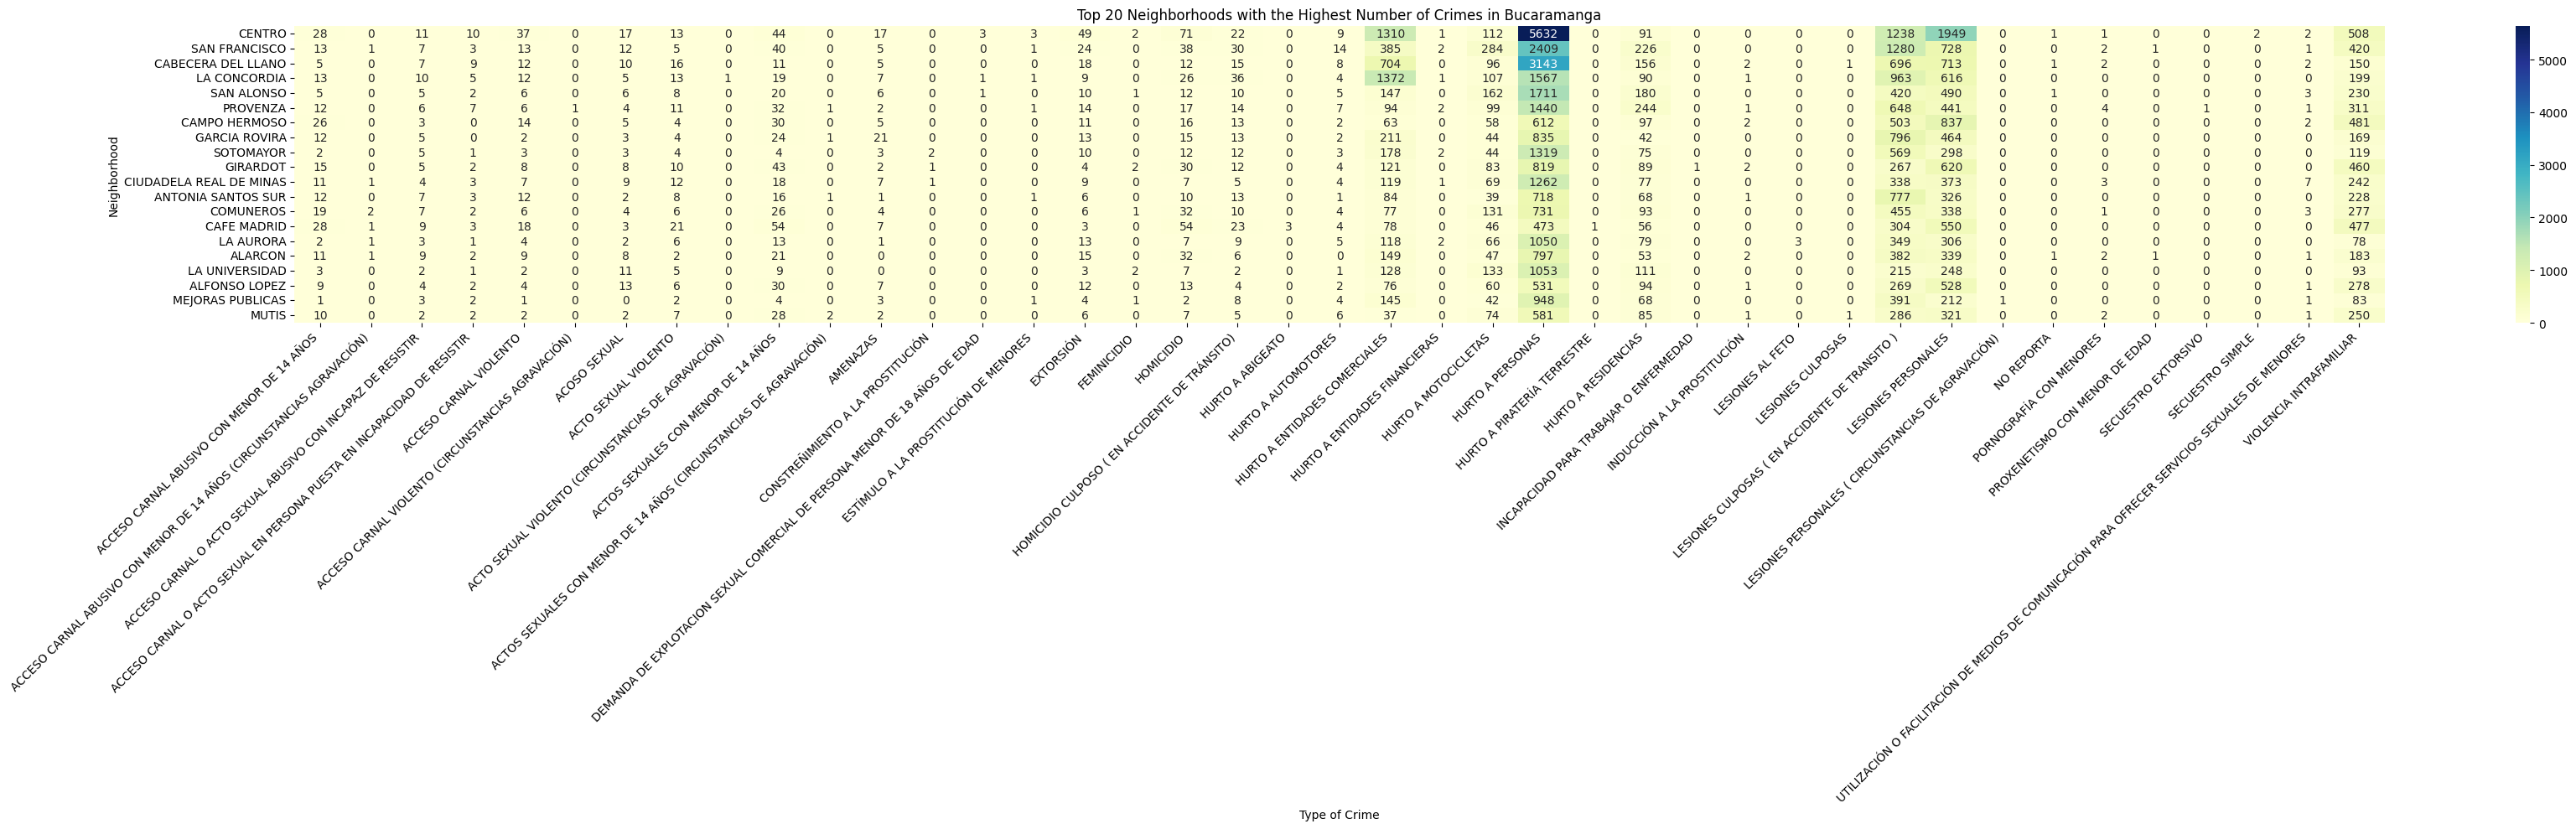

In [ ]:
# Filtering and preparing data for analysis
# We focus on 'BARRIOS_HECHO' and 'CONDUCTA' for the relationship between type of crime and neighborhoods
crime_data = data[['BARRIOS_HECHO', 'CONDUCTA']].dropna()

# Counting the occurrences of each type of crime in each neighborhood
crime_count = crime_data.groupby(['BARRIOS_HECHO', 'CONDUCTA']).size().reset_index(name='counts')

# Pivot table for better visualization - rows are neighborhoods, columns are types of crimes
pivot_crime = crime_count.pivot(index='BARRIOS_HECHO', columns='CONDUCTA', values='counts').fillna(0)

# Visualizing the top 20 neighborhoods with the highest number of crimes
top_neighborhoods = pivot_crime.sum(axis=1).sort_values(ascending=False).head(20)
top_crime_data = pivot_crime.loc[top_neighborhoods.index]

# Plotting
plt.figure(figsize=(35, 10))
sns.heatmap(top_crime_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Top 20 Neighborhoods with the Highest Number of Crimes in Bucaramanga')
plt.ylabel('Neighborhood')
plt.xlabel('Type of Crime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Evaluating the dataset based on the specified metrics

# 1. Completitud - Checking for missing values
missing_values = data.isnull().sum()

# 2. Consistencia y Uniformidad - Checking data types and unique values for potential inconsistencies
data_types = data.dtypes
unique_values = data.nunique()

# 3. Precisión - This typically requires an external reference for validation, which we don't have access to.

# 4. Validez - Checking for values out of expected ranges (for LATITUD and LONGITUD)
# Assuming latitude and longitude for Bucaramanga: Latitude (7.11392, 7.1250), Longitude (-73.1198, -73.1070)
valid_lat = data[(data['LATITUD'] >= 7.11392) & (data['LATITUD'] <= 7.1250)]
valid_lon = data[(data['LONGITUD'] >= -73.1198) & (data['LONGITUD'] <= -73.1070)]

# 5. Unicidad - Checking for duplicate rows
duplicates = data.duplicated().sum()

# 6. Integridad Referencial - Not applicable as we only have a single table.

# 7. Anomalías y Outliers - Using IQR for numerical columns
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_lat = detect_outliers(data, 'LATITUD')
outliers_lon = detect_outliers(data, 'LONGITUD')

# 8. Tendencias Temporales - Checking for data distribution over years
yearly_distribution = data['ANO'].value_counts().sort_index()

# Compiling the results
metrics_results = {
    "Missing Values": missing_values,
    "Data Types": data_types,
    "Unique Values": unique_values,
    "Valid Latitude Range Count": len(valid_lat),
    "Valid Longitude Range Count": len(valid_lon),
    "Duplicate Rows": duplicates,
    "Outliers in Latitude": len(outliers_lat),
    "Outliers in Longitude": len(outliers_lon),
    "Yearly Distribution": yearly_distribution
}

metrics_results


{'Missing Values': ORDEN                        0
 ARMAS_MEDIOS                 0
 BARRIOS_HECHO                0
 LATITUD                   9967
 LONGITUD                  9967
 ZONA                         0
 NOM_COMUNA                   0
 ANO                          0
 MES                          0
 DIA                          0
 DIA_SEMANA                   0
 DESCRIPCION_CONDUCTA         0
 CONDUCTA                     0
 CLASIFICACIONES DELITO       0
 EDAD                         0
 CURSO_DE_VIDA                0
 ESTADO_CIVIL_PERSONA         0
 GENERO                       0
 MOVIL_AGRESOR                0
 MOVIL_VICTIMA                0
 dtype: int64,
 'Data Types': ORDEN                       int64
 ARMAS_MEDIOS               object
 BARRIOS_HECHO              object
 LATITUD                   float64
 LONGITUD                  float64
 ZONA                       object
 NOM_COMUNA                 object
 ANO                         int64
 MES                        objec

In [ ]:
# Converting LATITUD and LONGITUD to numeric values, handling non-numeric entries as NaN
data['LATITUD'] = pd.to_numeric(data['LATITUD'], errors='coerce')
data['LONGITUD'] = pd.to_numeric(data['LONGITUD'], errors='coerce')

# Re-evaluating the metrics after conversion

# 4. Validez - Checking for values out of expected ranges (for LATITUD and LONGITUD) again
valid_lat = data[(data['LATITUD'] >= 7.11392) & (data['LATITUD'] <= 7.1250)]
valid_lon = data[(data['LONGITUD'] >= -73.1198) & (data['LONGITUD'] <= -73.1070)]

# 7. Anomalías y Outliers - Using IQR for numerical columns again
outliers_lat = detect_outliers(data, 'LATITUD')
outliers_lon = detect_outliers(data, 'LONGITUD')

# Updating the results
metrics_results['Valid Latitude Range Count'] = len(valid_lat)
metrics_results['Valid Longitude Range Count'] = len(valid_lon)
metrics_results['Outliers in Latitude'] = len(outliers_lat)
metrics_results['Outliers in Longitude'] = len(outliers_lon)

metrics_results


{'Missing Values': ORDEN                        0
 ARMAS_MEDIOS                 0
 BARRIOS_HECHO                0
 LATITUD                   9967
 LONGITUD                  9967
 ZONA                         0
 NOM_COMUNA                   0
 ANO                          0
 MES                          0
 DIA                          0
 DIA_SEMANA                   0
 DESCRIPCION_CONDUCTA         0
 CONDUCTA                     0
 CLASIFICACIONES DELITO       0
 EDAD                         0
 CURSO_DE_VIDA                0
 ESTADO_CIVIL_PERSONA         0
 GENERO                       0
 MOVIL_AGRESOR                0
 MOVIL_VICTIMA                0
 dtype: int64,
 'Data Types': ORDEN                       int64
 ARMAS_MEDIOS               object
 BARRIOS_HECHO              object
 LATITUD                   float64
 LONGITUD                  float64
 ZONA                       object
 NOM_COMUNA                 object
 ANO                         int64
 MES                        objec

In [ ]:
# Eliminating outliers directly without using their indices

# Filter out the outliers for latitude
clean_data_lat = data[~data.index.isin(outliers_lat.index)]

# Filter out the outliers for longitude from the already cleaned latitude data
clean_data = clean_data_lat[~clean_data_lat.index.isin(outliers_lon.index)]

# Verifying the removal of outliers
cleaned_outliers_lat = detect_outliers(clean_data, 'LATITUD')
cleaned_outliers_lon = detect_outliers(clean_data, 'LONGITUD')

# Number of outliers remaining after cleaning
remaining_outliers_after_cleaning = {
    "Outliers in Latitude After Cleaning": len(cleaned_outliers_lat),
    "Outliers in Longitude After Cleaning": len(cleaned_outliers_lon)
}

remaining_outliers_after_cleaning

{'Outliers in Latitude After Cleaning': 399,
 'Outliers in Longitude After Cleaning': 47}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer

# Preparando los datos para la clasificación

# Selecciono las columnas que necesito y elimino filas vacías
classification_data = clean_data[['BARRIOS_HECHO', 'DIA_SEMANA', 'GENERO', 'CONDUCTA']].dropna()

# Transformando datos categóricos a numéricos
label_encoder = LabelEncoder()
onehot_encoder = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['BARRIOS_HECHO', 'DIA_SEMANA', 'GENERO'])],
                                    remainder='passthrough')

X = onehot_encoder.fit_transform(classification_data[['BARRIOS_HECHO', 'DIA_SEMANA', 'GENERO']])
y = label_encoder.fit_transform(classification_data['CONDUCTA'])

# Dividiendo datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Se inicializan modelos
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
mlp_classifier = MLPClassifier(random_state=42)

# Entrenando modelos
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
mlp_classifier.fit(X_train, y_train)

# Haciendo predicciones
dt_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)
mlp_pred = mlp_classifier.predict(X_test)

# Evaluando los modelos
models = {'Decision Tree': dt_pred, 'Random Forest': rf_pred, 'SVM': svm_pred, 'Neural Network': mlp_pred}
performance = {model: accuracy_score(y_test, prediction) for model, prediction in models.items()}

performance



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Decision Tree': 0.44160961931947357,
 'Random Forest': 0.4441357011140021,
 'SVM': 0.4528759441230707,
 'Neural Network': 0.4445146133831813}